# Домашнее задание №4

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import re
from datetime import datetime
%matplotlib inline

Загрузить датасет на выбор.
Например, датасет о футболистах (для тех, кто интересуется футболом): https://www.kaggle.com/karangadiya/fifa19

In [2]:
data=pd.read_csv('data.csv')

In [5]:
#в данных некторые числовые данные представлены в виде строк, исправим с помощью функции
#при этом NA во всех обрабатываемых series преобразуются в 0
def get_number(str):
    #пробуем найти K/M/' в полях стоимости и роста
    koef=1
    try:
        if re.findall(r"[KM']", str)[0] == 'K':
            koef=1000
        elif re.findall(r"[KM']", str)[0] == 'M':
            koef=1000000
        elif re.findall(r"[KM']", str)[0] == "'":
            koef=30.48 #1 фут
    except:
        koef=1
    try: 
        if len(re.findall(r"[+]", str))>0:
            str = sum([int(item) for item in re.split(r"\+", str)])
        else:
            str = re.sub(r'[€KMlbs]', '', str)
            str = re.sub(r"[']", '.', str)
    except:
        str='0'
    return int(float(str)*koef)

# get_number('€110.5M')

In [6]:
data['Value'] = data['Value'].apply(get_number)
data['Wage'] = data['Wage'].apply(get_number)
data['Height'] = data['Height'].apply(get_number)
data['Weight'] = data['Weight'].apply(get_number)
data['Release Clause'] = data['Release Clause'].apply(get_number)
data['LS'] = data['LS'].apply(get_number)
data['ST'] = data['ST'].apply(get_number)
data['RS'] = data['RS'].apply(get_number)
data['LW'] = data['LW'].apply(get_number)
data['LF'] = data['LF'].apply(get_number)
data['CF'] = data['CF'].apply(get_number)
data['RF'] = data['RF'].apply(get_number)
data['RW'] = data['RW'].apply(get_number)
data['LAM'] = data['LAM'].apply(get_number)
data['CAM'] = data['CAM'].apply(get_number)
data['RAM'] = data['RAM'].apply(get_number)
data['LM'] = data['LM'].apply(get_number)
data['LCM'] = data['LCM'].apply(get_number)
data['CM'] = data['CM'].apply(get_number)
data['RCM'] = data['RCM'].apply(get_number)
data['RM'] = data['RM'].apply(get_number)
data['LWB'] = data['LWB'].apply(get_number)
data['LDM'] = data['LDM'].apply(get_number)
data['CDM'] = data['CDM'].apply(get_number)
data['RDM'] = data['RDM'].apply(get_number)
data['RWB'] = data['RWB'].apply(get_number)
data['LB'] = data['LB'].apply(get_number)
data['LCB'] = data['LCB'].apply(get_number)
data['CB'] = data['CB'].apply(get_number)
data['RCB'] = data['RCB'].apply(get_number)
data['RB'] = data['RB'].apply(get_number)

In [20]:
#93% даннных -NAN, можно избавиться от такого поля
#data.drop(columns='Loaned From',inplace=True)
data.drop(columns='Unnamed: 0',inplace=True)

In [8]:
# Joined - дата присоединения к клубу, преобразуем в дату, выбросы заполняем максимальной датой в сете
def get_date(str):
    try:
        date = datetime.strptime(str, '%b %d, %Y')
    except:
        date = datetime.strptime('Jul 1, 2012', '%b %d, %Y')
    return date
data['Joined']=data['Joined'].apply(get_date)

In [14]:
data.isnull().sum()

Unnamed: 0                    0
ID                            0
Name                          0
Age                           0
Photo                         0
Nationality                   0
Flag                          0
Overall                       0
Potential                     0
Club                        241
Club Logo                     0
Value                         0
Wage                          0
Special                       0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Real Face                    48
Position                     60
Jersey Number                60
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
LS                            0
ST                            0
RS                            0
                           ... 
Dribblin

In [15]:
#к этому моменту самой "некачественное поле" - Contract Valid Until, отсуствует 1.58% данных. 
data = data.dropna()

In [17]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
                           ..
Dribbling                   0
Curve                       0
FKAccuracy

In [60]:
#добавляем категориальные данные в числовом выражении
data.loc[data['Preferred Foot'] == 'Left', 'Foot'] = 0
data.loc[data['Preferred Foot'] == 'Right', 'Foot'] = 1

data.loc[data['Real Face'] == 'Yes', 'Face'] = 0
data.loc[data['Real Face'] == 'No', 'Face'] = 1

# 1 
Сделать график histogram для данных таблицы. К какому распределению можно отнести эти графики?

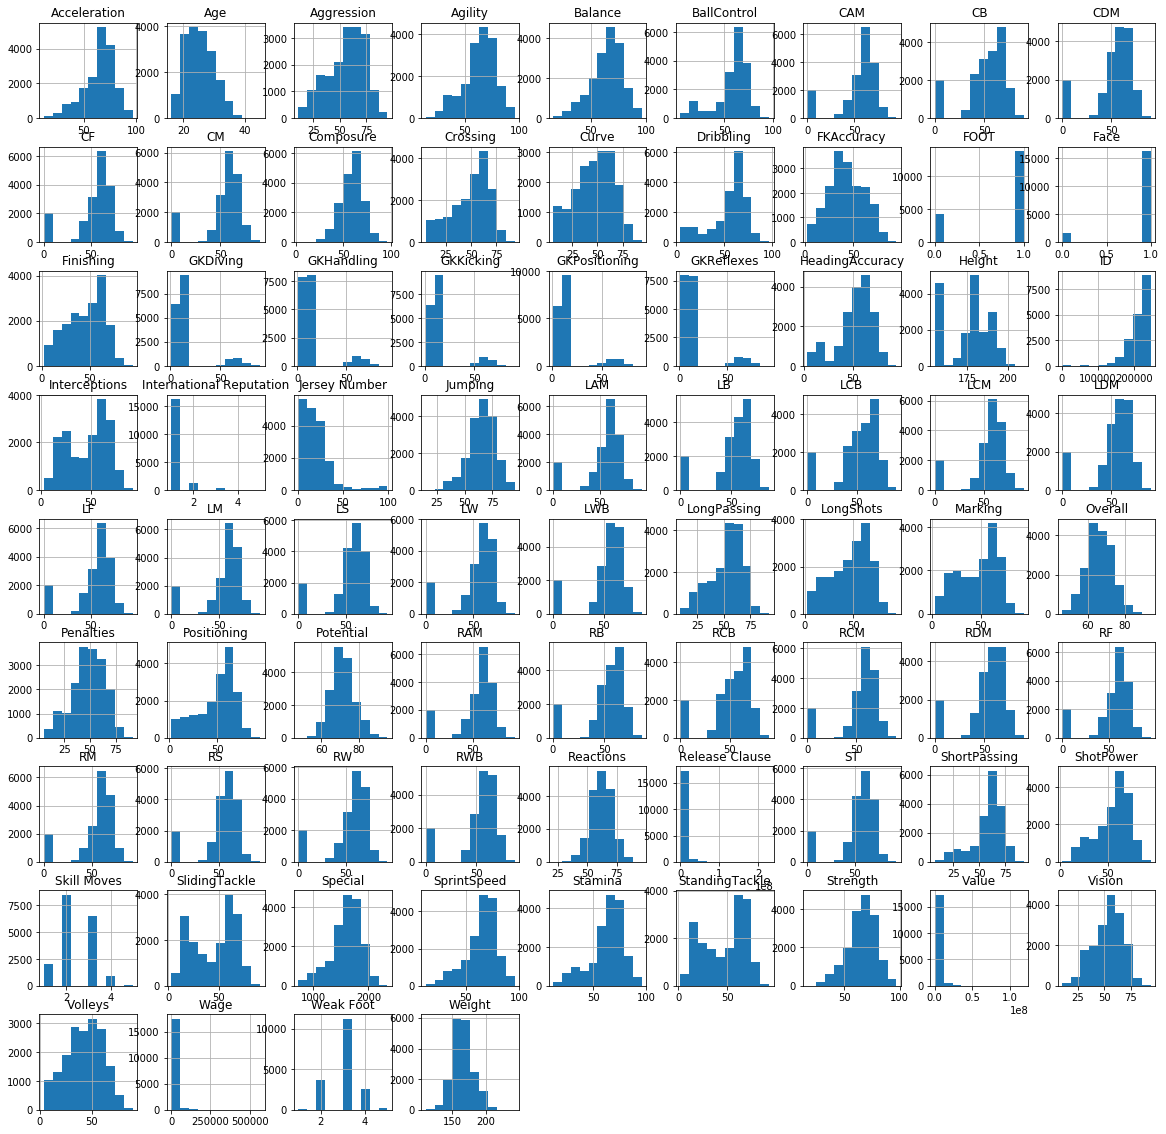

In [23]:
data.hist(figsize=(20,20))
plt.show()

Плотность распределения:
'Age': - распределение лог-нормальное. Можно объяснить тем, что в FIFA19 нет молодежных лиг, а значит возраст прихода в клубы игроков - это 18-19 лет, очень редко, но бываеют случаи, когда игроки переходят во взрослые лиги в 16-17 лет.
'Overall', как и все другие поля скиллов, имеют нормальное распределение. (однако, можно заметить, что те навыки, которые характерны голкиперам имеют нормальное распределение только внутри категории - GK, и наоборот, навыки полевых игроков - нормально распределны внутри группы, а голкиперы выглядя как выбросы на этих графиках) Возможно, имеет смысл рассматривать отдельно эти категории игроков.)

'Jersey Number' - геометрическое распределение, т.е. большинство команд нумеруем игроков начания с 1
 FOOT, FACE - биномиальное

# 2
Найти в датасете переменную, которую можно предсказать с помощью моделей машинного обучения (например, Overall - рейтинг футболиста в датасете о футболистах).

Эта переменная является target value, или значение, которые мы хотим предсказать. Построить корреляцию данной переменной с другими колонками.  Сделать вывод о том, какие значения коррелируют с данной target value

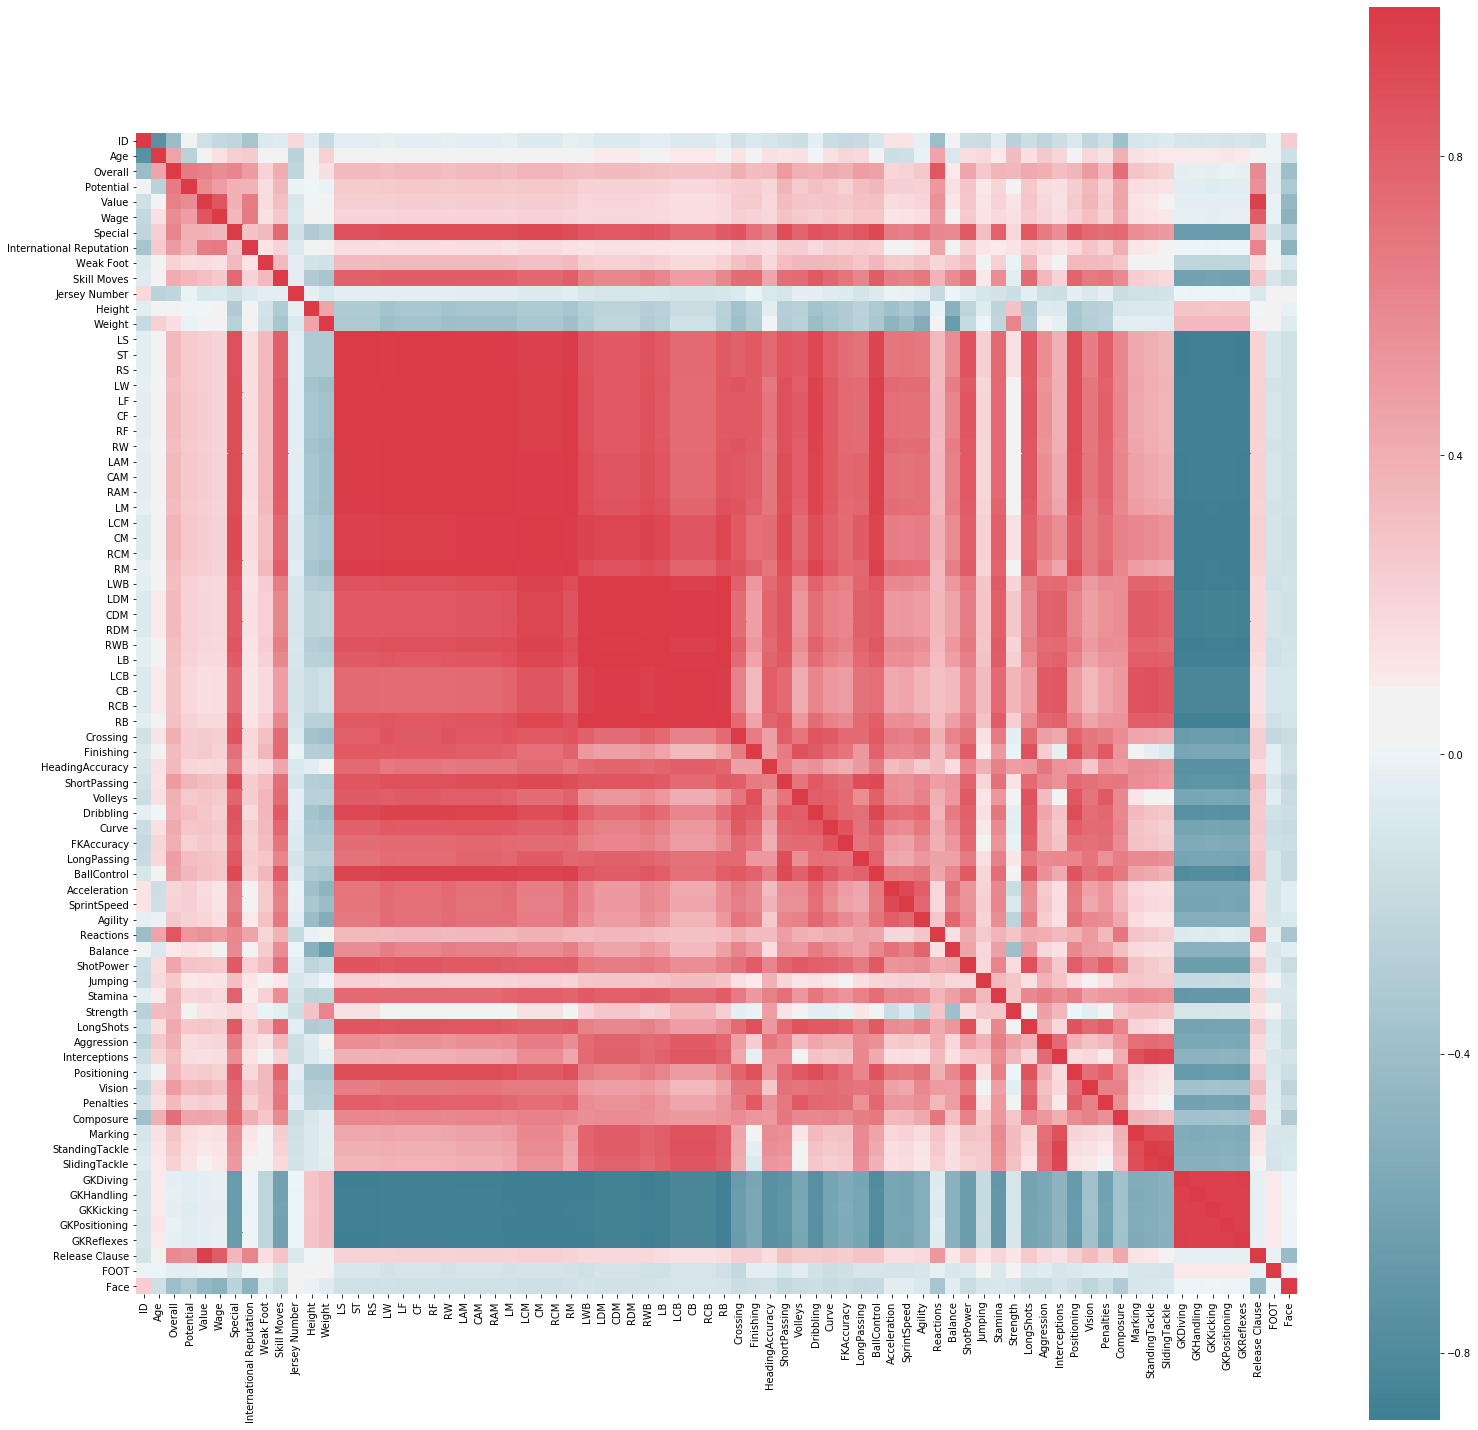

In [35]:
#в качестве target value возьмем Wage
f, ax = plt.subplots(figsize=(26, 26))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Матрица коорелиц показывает очень сильную связь между собой у переменных, которые описывают оценку игрока в зависимости от позиции на поле. По идее, значит их все можно удалить

In [72]:
print(data.corr()['Wage'].sort_values(ascending = False).head(10))
print(data.corr()['Wage'].sort_values(ascending = False).tail())

Wage                        1.000000
Value                       0.858030
Release Clause              0.819690
International Reputation    0.670736
Overall                     0.575940
Reactions                   0.499564
Potential                   0.488999
Composure                   0.423256
Special                     0.350178
Vision                      0.317034
Name: Wage, dtype: float64
GKReflexes      -0.025579
GKKicking       -0.027897
Jersey Number   -0.089595
ID              -0.204988
Face            -0.495561
Name: Wage, dtype: float64


C Wage максимально выраженная корреляция у Value (что вполне предсказуемо), Release Clause, International Reputation, Overall.
НИкакой переменно с отрицательной корреляцией воспользоваться не получится, т.к. самая выраженная из отрицательных - категориальная, и означает есть ли фото у игрока или нет. Дальше ID и номер футболки, тоже неприменимы.

# 3 
Найти в датасете классификационные данные (например, в датасете о футболистах, это 
Nationality). Посмотреть количество элементов в каждом классе. Есть ли в данных проблема несбалансированности классов? Что мы можем сделать, чтобы сделать классы сбалансированными? (на эту тему можно почитать статью https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). Применить методы (если получится) для балансировки данных.

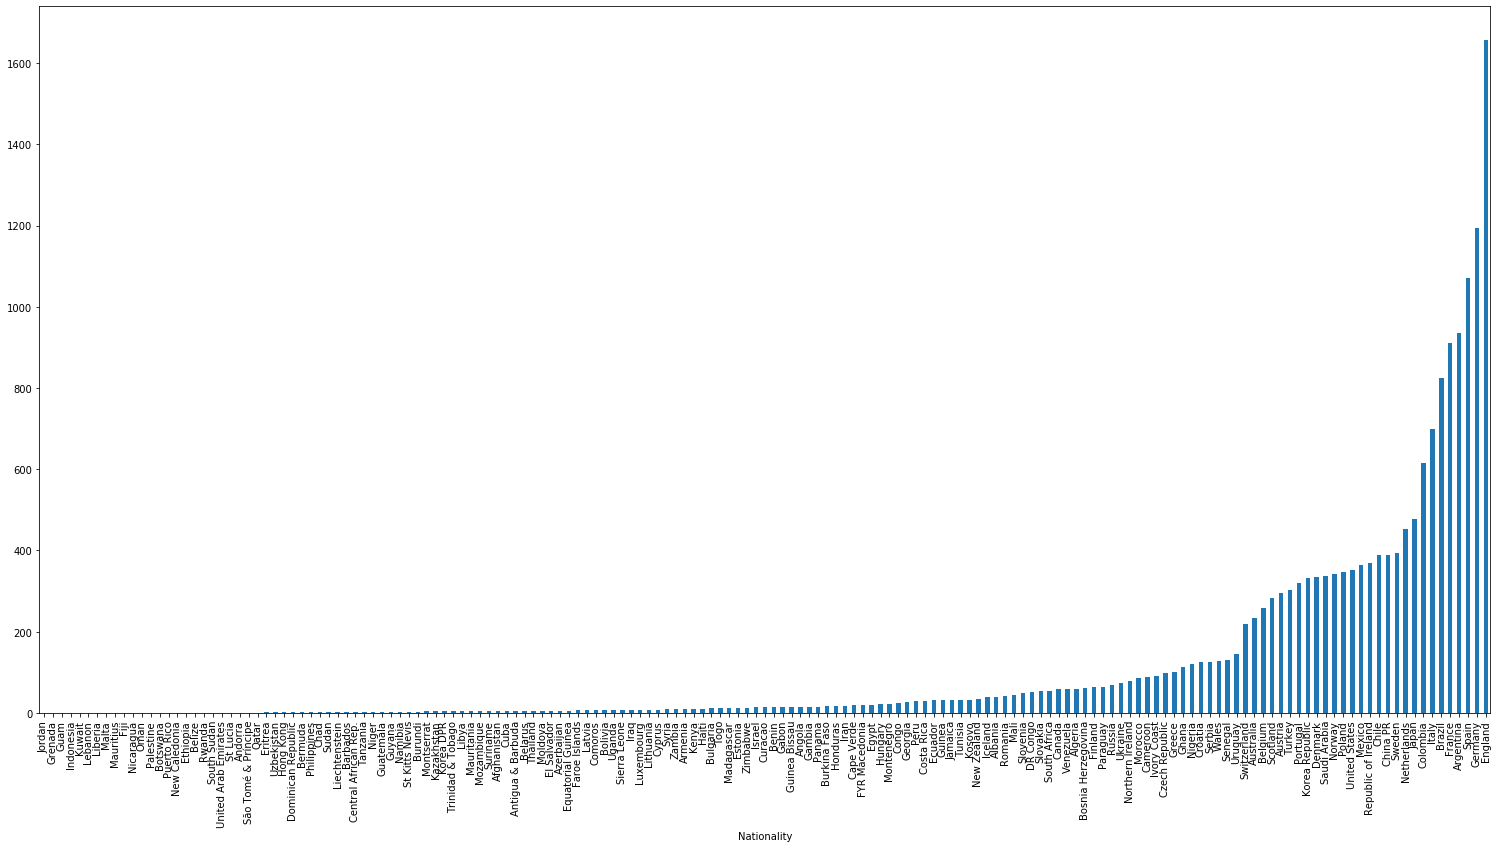

In [59]:
data.groupby(['Nationality']).count()['ID'].sort_values().plot.bar(figsize=(26, 13))


В данныех есть проблема несбалансированности классов, из графика видно, что наиболее часто встречаются в датасете футболисты европейского и южномамериканского происхождения. Там наиболее развитые национальные чемпионаты. 
Однако, мне не очень понятно зачем нам в данном случае балансировать, если в данном случае мы не решаем проблему классификации?

# 4
Сгенерировать из классов (например, колонки  Preferred Foot,  Body Type из датасета о футболистах) вектор one-hot encoding. Для чего мы переводим классы в вектора? 

In [71]:
#  переводим в вектора для возможности сравнения: то есть M новых переменных из вектора one-hot encoding смогут быть 
# добавлены в размерность общего вектора, в виде которого представлена каждая строка
data_new = pd.get_dummies(data, columns = ["Foot","Face","Body Type"],
                             prefix=["Foot","Face","Body Type"])

data_new.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo',
       ...
       'Body Type_Akinfenwa', 'Body Type_C. Ronaldo', 'Body Type_Courtois',
       'Body Type_Lean', 'Body Type_Messi', 'Body Type_Neymar',
       'Body Type_Normal', 'Body Type_PLAYER_BODY_TYPE_25',
       'Body Type_Shaqiri', 'Body Type_Stocky'],
      dtype='object', length=101)

# 5
Допустим, мы хотим предсказать зарплату футболиста, основываясь на всех данных в таблице. Какие колонки можно выбрать для линейной регресси? Почему (посмотреть матрицу корреляций)? Написать модель линейной регрессии.

Выше по этой перемнной как раз уже построил матрицу корреляций и описал переменные, наиболее сильно коррелированные.

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# X_train_27, X_test_27, y_train_27, y_test_27 = train_test_split(input_x, Y, test_size=0.3)
'''
Wage                        1.000000
Value                       0.858030
Release Clause              0.819690
International Reputation    0.670736
Overall                     0.575940
Reactions                   0.499564
Potential                   0.488999
Composure                   0.423256
Special                     0.350178
Vision                      0.317034
'''

column_sels = ['Value', 'Release Clause', 'International Reputation', 'Overall']
x = data.loc[:,column_sels]
value = x['Value']
RC = x['Release Clause']
IR = x['International Reputation']
overall = x['Overall']


y = data['Wage']
x = np.vstack([np.array(value), np.array(RC), np.array(IR), 
               np.array(overall)]).T

X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

model = LinearRegression().fit(X_train, y_train)

In [78]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: -14593.68343493142
slope: [ 3.15236474e-03 -1.83286534e-04  1.07498658e+04  8.37291559e+01]


In [79]:
model.score(X_test, y_test)

0.7748141796901787

# 6
Удалить с помощью регулярного выражения из колонки Name слова с точками (A. Griezmann -> Griezmann). После этого посмотреть, какое имя встречается в таблице чаще всего?

In [103]:
data['Name_new'] = data['Name'].apply(lambda str: re.sub(r'\w. ', '', str))
data.groupby(['Name_new']).count()['ID'].sort_values(ascending = False).head(10)

Name_new
Rodríguez    43
González     32
Gómez        29
Hernández    28
Williams     27
Smith        26
Pérez        25
Martínez     25
Fernández    24
López        23
Name: ID, dtype: int64

# 7 
Допустим, мы хотим предсказать International Reputation основываясь на значении Value. Имеют ли данные значения корреляцию? Показать графически и математически. 

In [106]:
column_IR = ['Value', 'International Reputation']
data_IR = data.loc[:,column_IR]
data_IR.corr() # корреляция - 65%, то есть имеется довольно сильная свзяь переменных

,Value,International Reputation
Value,1.000000,0.655187
International Reputation,0.655187,1.000000


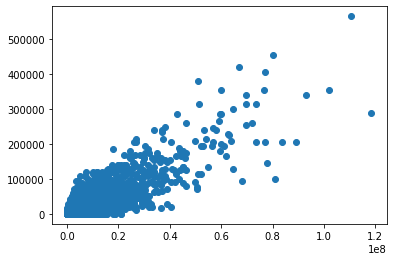

In [111]:
x=data_IR['International Reputation']
x=data_IR['Value']
plt.scatter(x, y)
plt.show() 

Сравнить свой анализ с ноутбуком из каггл. Например, https://www.kaggle.com/nitinchan/fifa19-analysis-viz-recommendation. Что можно добавить к анализу своей работы?

Посмотрел, очень погравились средства визуализации и подходы к структурированию анализа, буду использовать